In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

Đọc và lưu ảnh
img = cv.imread(filename[,flag])

flag = 0: load ảnh theo dạng ảnh xám

flag = 1: load ảnh theo dạng ảnh màu.

Flag sẽ default bằng 1

Vì trên jupyter notebook không sử dụng được cv.imshow() nên em sẽ thay bằng plt.imshow()



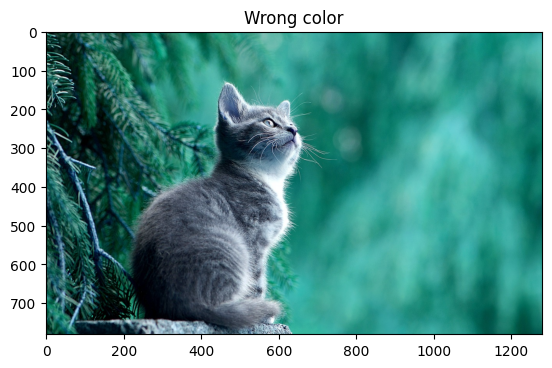

In [63]:
img = cv.imread('/content/drive/MyDrive/OpenCV/Photos/4.jpg')
plt.imshow(img)
plt.title('Wrong color')
plt.show()


Ảnh trong plt được đọc theo RGB còn OpenCV sẽ load ảnh theo dạng màu BGR nên ta phải đổi lại sử dụng cv.cvtColor()

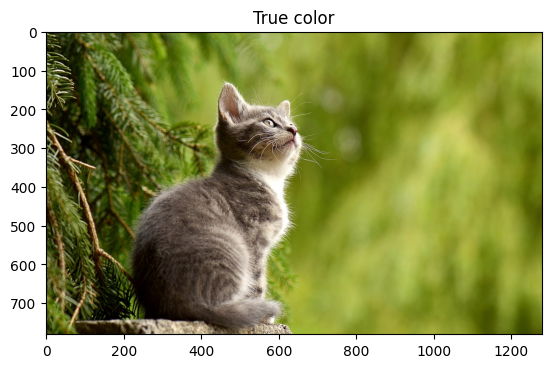

In [64]:
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title('True color')
plt.show()

Ngoài ra còn một số kiểu đổi sang không gian màu khác như BGR sang GRAY, HSV, LAB... và ngược lại mà thường được sử dụng.

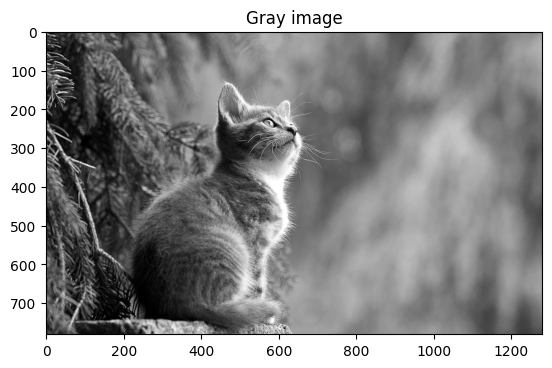

In [65]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray image')
plt.show()

Splitting and Merging color channels

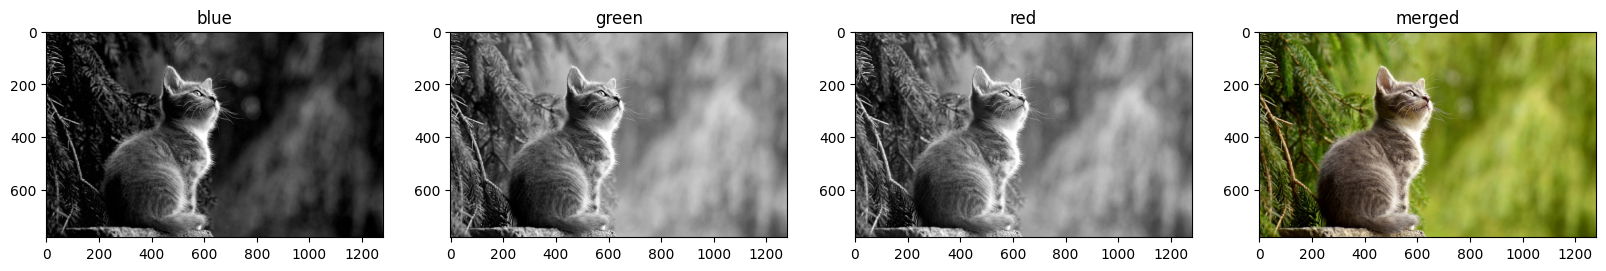

In [66]:
blank = np.zeros(img.shape[:2], dtype='uint8')
b,g,r = cv.split(img)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(b, cmap='gray');plt.title('blue');
plt.subplot(142);plt.imshow(g, cmap='gray');plt.title('green');
plt.subplot(143);plt.imshow(r, cmap='gray');plt.title('red');

img_Merged = cv.merge([b,g,r])
plt.subplot(144);plt.imshow(img_Merged[:,:,::-1]);plt.title('merged');

Lưu ảnh

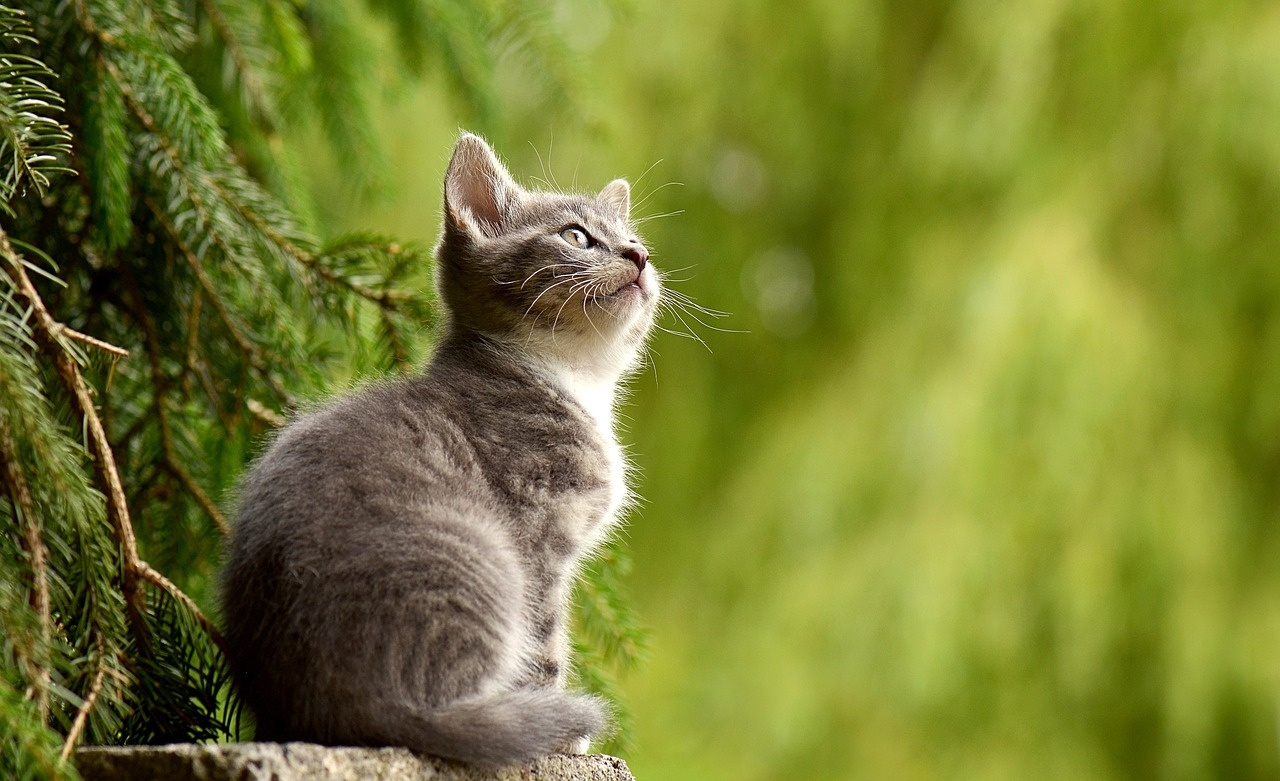

In [67]:
cv.imwrite('Save cat image.jpg', img)
Image('Save cat image.jpg')

Các thao tác với ảnh:

- Accessing and manipulating images pixels

- Cropping

- Flipping

- Rotating

[[ 32  36  69 ... 148 147 146]
 [ 26  31  42 ... 149 149 150]
 [ 17  23  34 ... 149 151 153]
 ...
 [ 30  34  38 ...  79  83  81]
 [ 35  39  40 ...  78  81  80]
 [ 36  40  41 ...  77  81  81]]


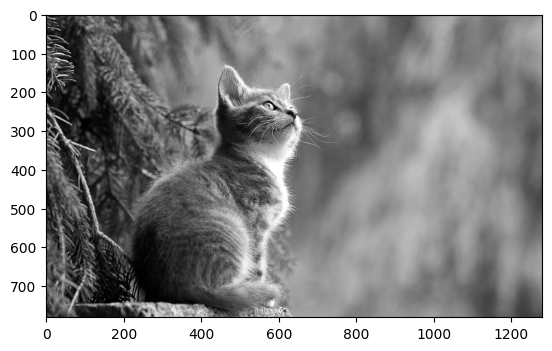

In [68]:
plt.imshow(gray_img,cmap='gray')
print(gray_img)

[[255 255 255 ... 148 147 146]
 [255 255 255 ... 149 149 150]
 [255 255 255 ... 149 151 153]
 ...
 [ 30  34  38 ...  79  83  81]
 [ 35  39  40 ...  78  81  80]
 [ 36  40  41 ...  77  81  81]]


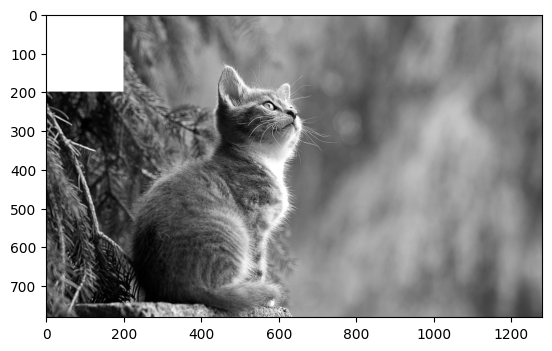

In [69]:
# Modifying image pixels

gray_cat = gray_img.copy()
gray_cat[:200,:200] = 255

plt.imshow(gray_cat, cmap='gray')
print(gray_cat)

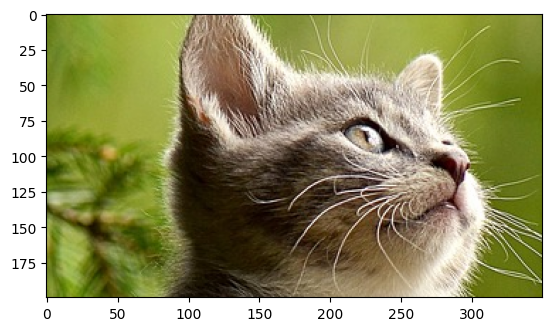

In [70]:
# Cropping

face_cat = img[:,:,::-1]
face_cat = face_cat[150:350,350:700]
plt.imshow(face_cat)


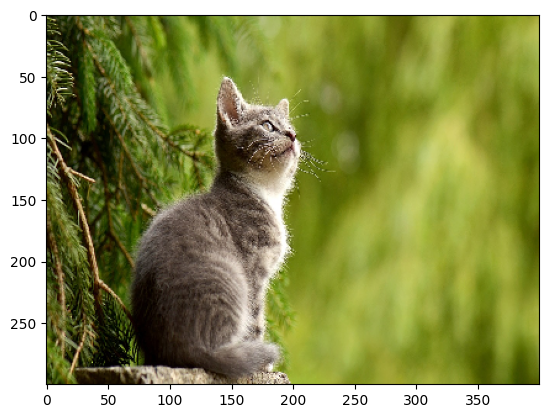

In [71]:
# Resize image
conversed_img = img[:,:,::-1]
width = 400
height = 300
resized_img = cv.resize(conversed_img, dsize=(width, height), interpolation=cv.INTER_CUBIC)
plt.imshow(resized_img)


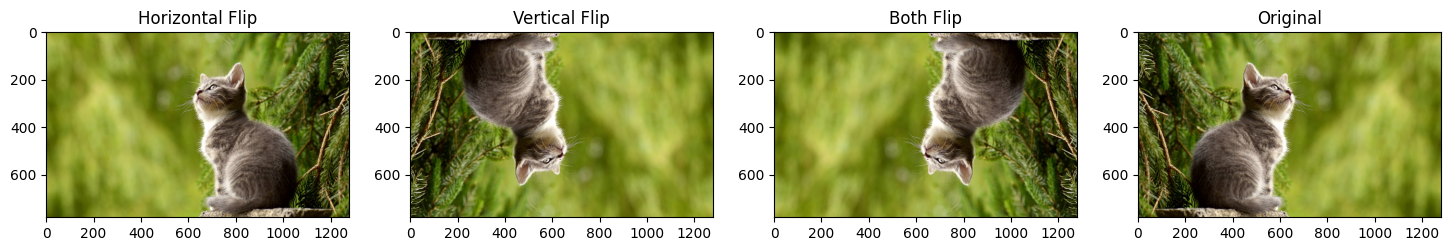

In [72]:
# Flipping image
# Có 3 kiểu flip: horizontal flip(1), vertical flip(0), both(-1)

img_hoz_flip = cv.flip(conversed_img,1)
img_ver_flip = cv.flip(conversed_img,0)
img_both_flip = cv.flip(conversed_img,-1)


plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_hoz_flip);plt.title('Horizontal Flip')
plt.subplot(142);plt.imshow(img_ver_flip);plt.title('Vertical Flip')
plt.subplot(143);plt.imshow(img_both_flip);plt.title('Both Flip')
plt.subplot(144);plt.imshow(conversed_img);plt.title('Original')
plt.show()

Một số thao tác với ảnh khác như vẽ Line, Circle, Rectangle, Add Text...

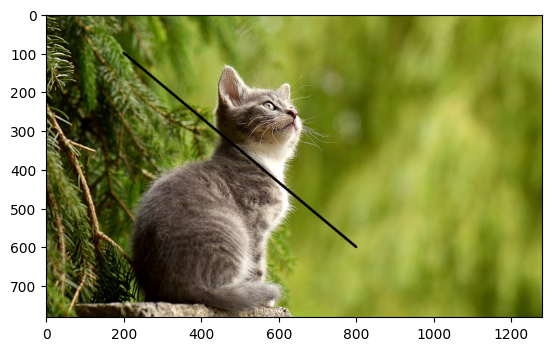

In [73]:
draw_img = conversed_img.copy()
cv.line(draw_img, (200,100), (800,600), (0,0,0), thickness=5)
plt.imshow(draw_img)

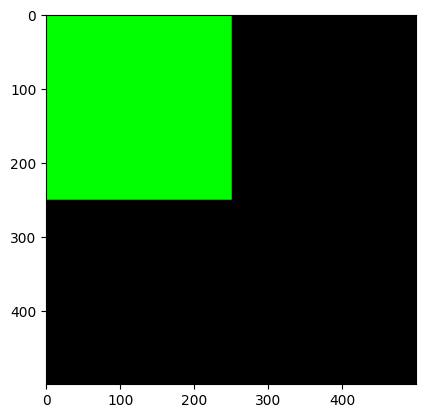

In [74]:
# Rectangle

blank = np.zeros((500,500,3), dtype='uint8')
cv.rectangle(blank,(0,0),(blank.shape[1]//2,blank.shape[0]//2), (0,255,0), thickness=cv.FILLED)
plt.imshow(blank)

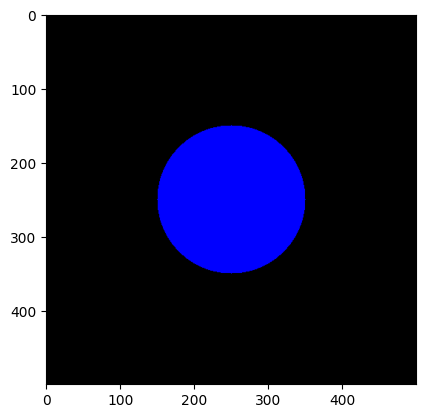

In [75]:
# Circle
blank = np.zeros((500,500,3), dtype='uint8')
cv.circle(blank, (blank.shape[1]//2,blank.shape[0]//2), 100, (0,0,255), thickness=-1 )
plt.imshow(blank)

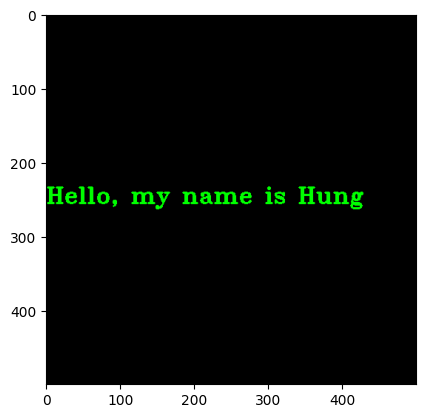

In [76]:
# Add Text
blank = np.zeros((500,500,3), dtype='uint8')
cv.putText(blank,'Hello, my name is Hung', (0,255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
plt.imshow(blank)

Image Enhancement

1. Darkness and Brightness

Cộng ảnh với một ma trận dương để ảnh sáng hơn.

Ngược lại trừ ma trận dương thì ảnh sẽ tối hơn.

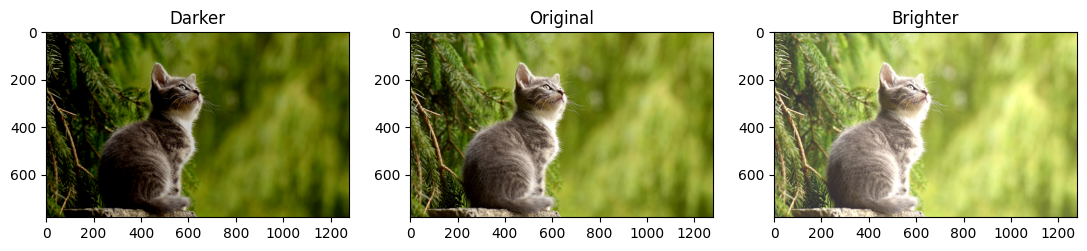

In [77]:
matrix = np.ones(conversed_img.shape, dtype='uint8')*50

img_brighter = cv.add(conversed_img, matrix)
img_darker = cv.subtract(conversed_img, matrix)

plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_darker);plt.title('Darker');
plt.subplot(142);plt.imshow(conversed_img);plt.title('Original');
plt.subplot(143);plt.imshow(img_brighter);plt.title('Brighter');

2. Multiplication or Contrast

- Nhân các pixels của ảnh với số >1 sẽ tăng Contrast

- Số <1 sẽ làm giảm Contrast

3. Thresholding

Thường được sử dụng để tạo các ảnh nhị phân trong đó với bức ảnh xám gốc, các pixel < ngưỡng T sẽ về 0 còn > ngưỡng T sẽ về 255.

Các ảnh nhị phân này thường được dùng để tạo Mask. Một Mask giúp chúng ta chú ý hơn đến một phần nhất định của bức ảnh.

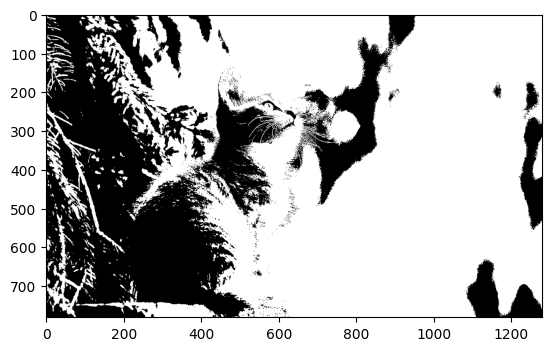

In [78]:
retval, thresh = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

4. Các toán tử Bitwise

- AND
- OR
- XOR
- NOT

5. Masking

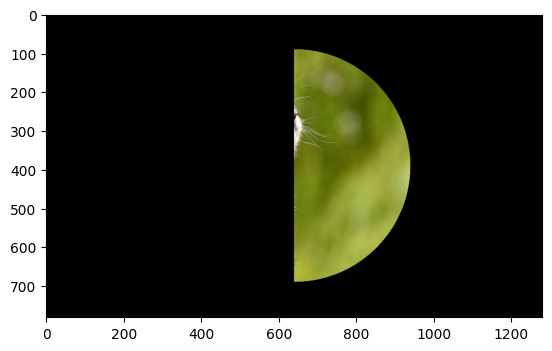

In [79]:
blank = np.zeros(img.shape[:2], dtype='uint8')
circle = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 300, 255, -1)
rectangle = cv.rectangle(blank.copy(), (img.shape[1]//2,img.shape[0]//2-300), (img.shape[1]//2+300,img.shape[0]//2+300), 255, -1)
weird_shape = cv.bitwise_and(circle, rectangle)
plt.imshow(weird_shape)

masked = cv.bitwise_and(conversed_img,conversed_img,mask=weird_shape)
plt.imshow(masked)

6. Làm mờ ảnh

Có nhiều phương pháp làm mờ: Average, Gaussian, Median, Bilateral...

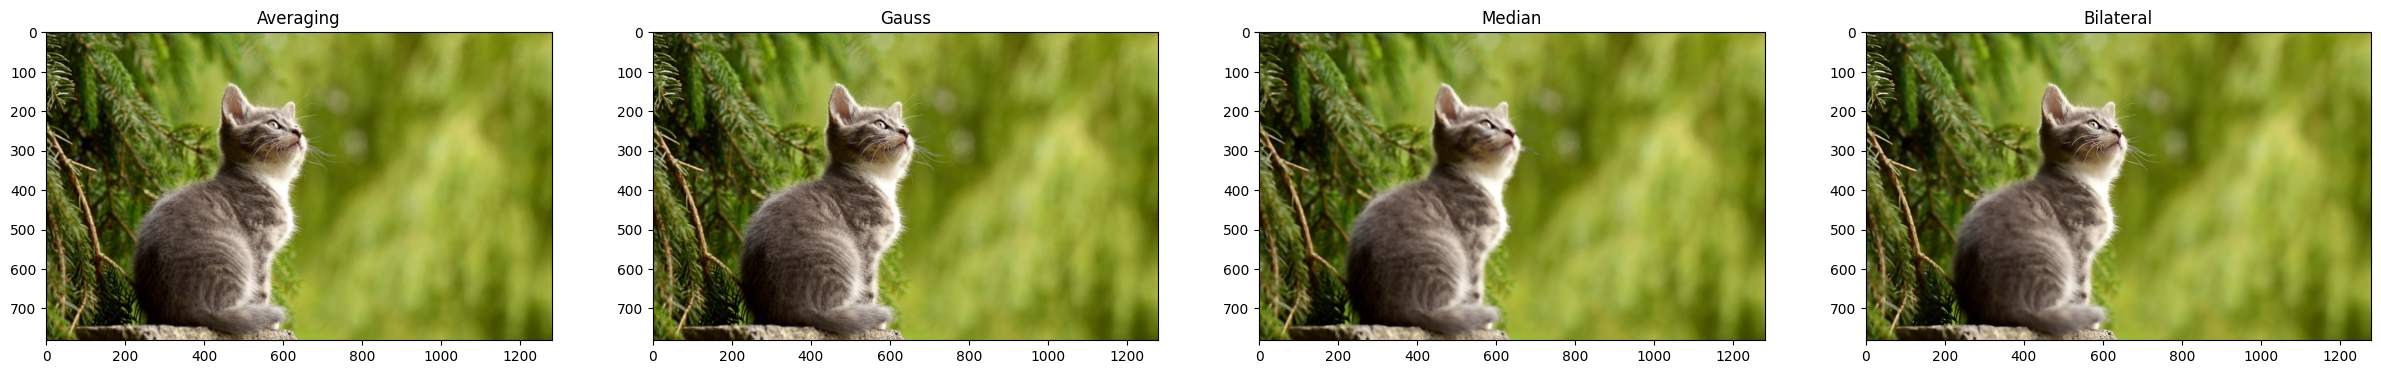

In [91]:
# Averaging
average = cv.blur(conversed_img, (3,3))


# Gaussian Blur
gauss = cv.GaussianBlur(conversed_img,(3,3), 0)


# Median Blur
median = cv.medianBlur(conversed_img, 7)


# Bilateral
bilateral = cv.bilateralFilter(conversed_img, 10, 75, 75)

plt.figure(figsize=[30,10])
plt.subplot(141);plt.imshow(average);plt.title('Averaging')
plt.subplot(142);plt.imshow(gauss);plt.title('Gauss')
plt.subplot(143);plt.imshow(median);plt.title('Median')
plt.subplot(144);plt.imshow(bilateral);plt.title('Bilateral')
plt.show()


Các phương pháp phát hiện cạnh thường dùng: Laplacian, Sobel, Canny

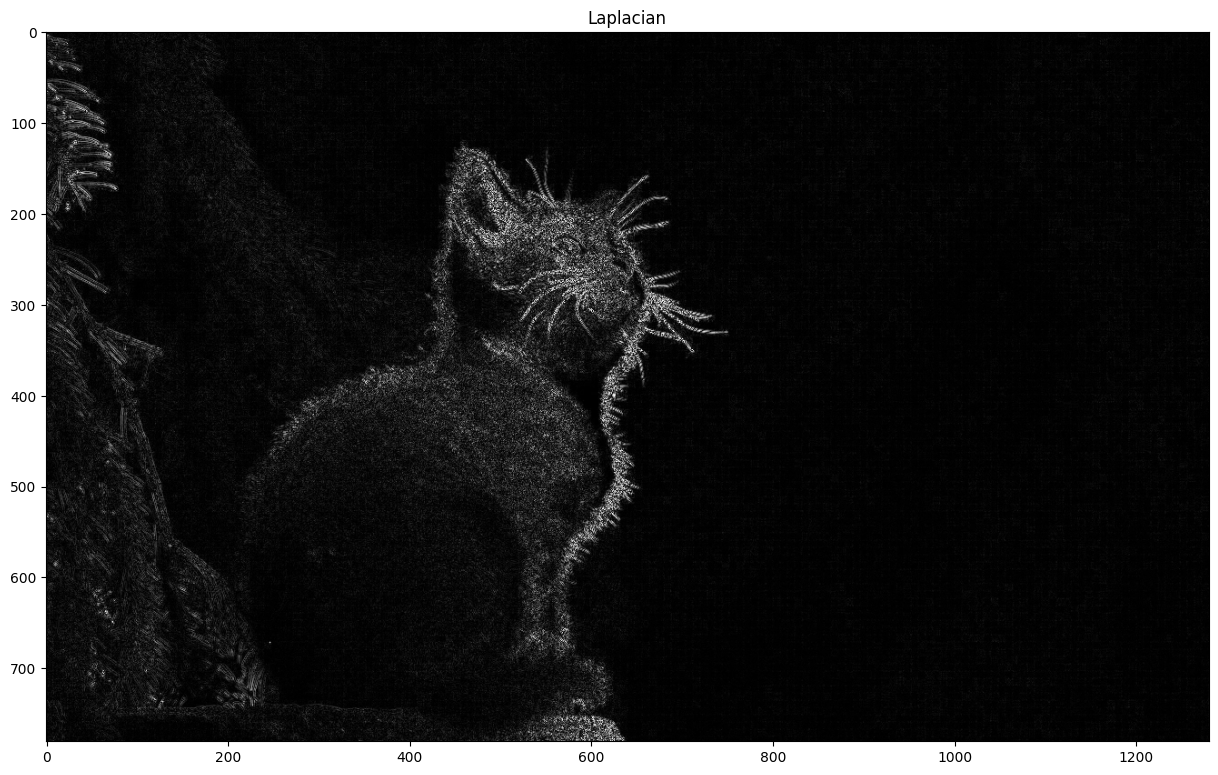

In [94]:
# laplacian
lap = cv.Laplacian(gray_img,cv.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.figure(figsize=(15,10))
plt.imshow(lap, cmap='gray');plt.title('Laplacian')
plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:484: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


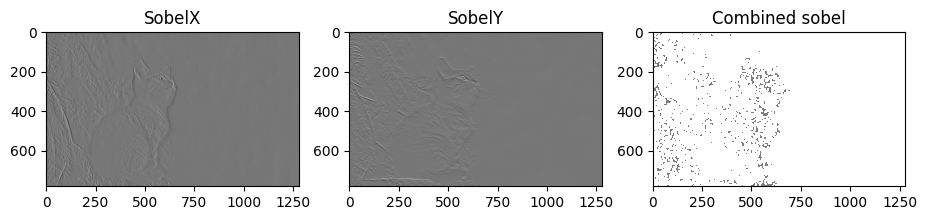

In [96]:
# Sobel
sobelx = cv.Sobel(gray_img, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray_img, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

plt.figure(figsize=(15,10))
plt.subplot(141);plt.imshow(sobelx,cmap='gray');plt.title('SobelX')
plt.subplot(142);plt.imshow(sobely,cmap='gray');plt.title('SobelY')
plt.subplot(143);plt.imshow(combined_sobel,cmap='gray');plt.title('Combined sobel')
plt.show()



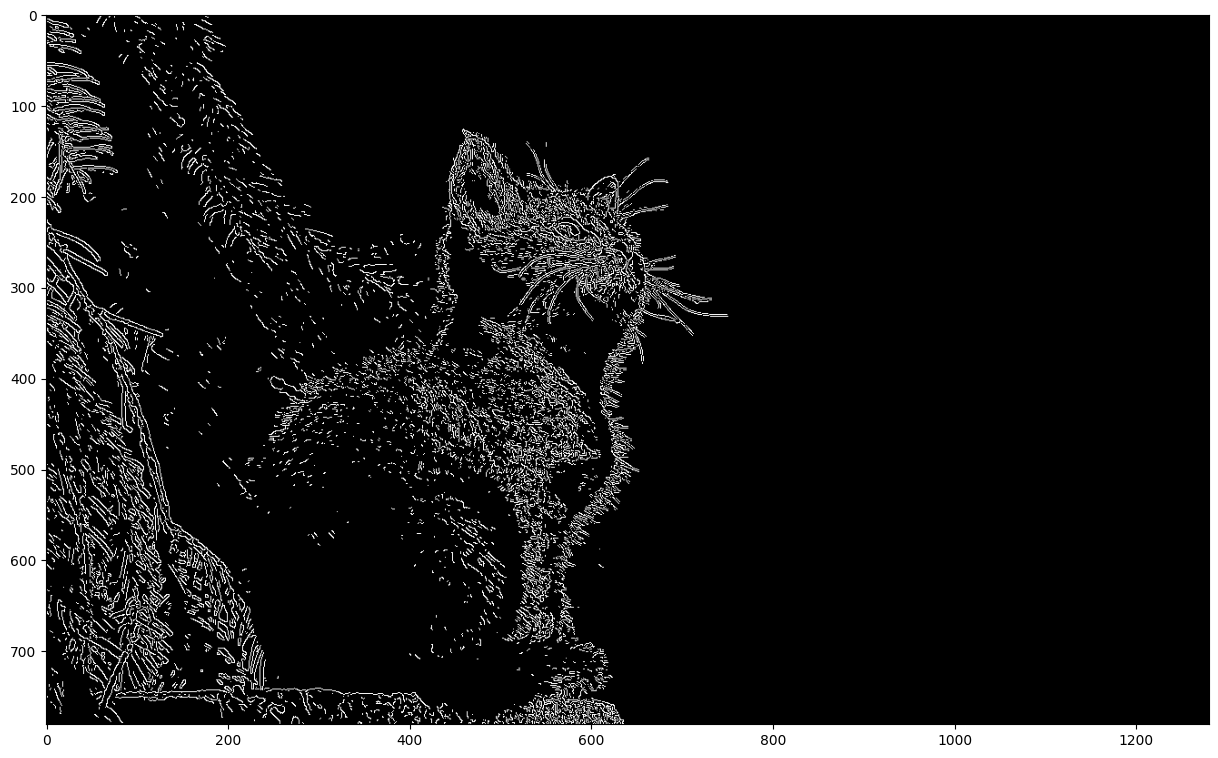

In [97]:
# Canny
canny = cv.Canny(gray_img, 150, 175)
plt.figure(figsize=(15,10))
plt.imshow(canny,cmap='gray')
plt.show()